# 1. Importando as bibliotecas necessárias

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from dataprep.eda import create_report, plot_correlation # pip install dataprep

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# 2. Carregando o dataset

In [5]:
dataset = pd.read_csv('wine.csv')
dataset.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 3. Re-escala usando máximo e mínimo

In [9]:
dataset = (dataset - dataset.min())/(dataset.max()-dataset.min())

# 4. Organizando dados para modelagem

## 4.1. Dividindo os dados em atributos descritores e atributo de classe (target)

In [10]:
X = dataset.iloc[:, 1:]
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [11]:
y = dataset.Wine.astype(int)
y

0      0
1      0
2      0
3      0
4      0
      ..
173    1
174    1
175    1
176    1
177    1
Name: Wine, Length: 178, dtype: int64

## 4.2. Descobrindo quais são as melhores variáveis

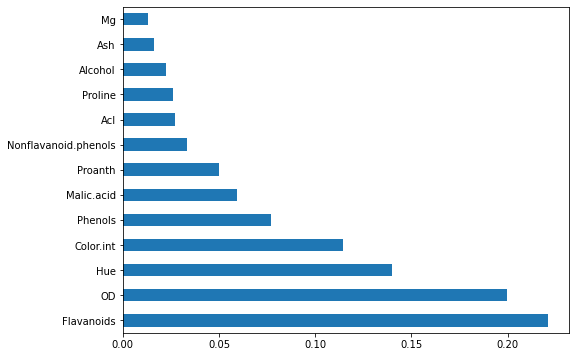

In [12]:
# Usando o ExtraTree  para nos mostrar as Variáveis mais Importantes
modelo = ExtraTreesClassifier()
modelo.fit(X,y)

plt.figure(figsize=(8,6))
melhores = pd.Series(modelo.feature_importances_,index=X.columns)
melhores.nlargest(24).plot(kind='barh')
plt.show()

In [13]:
#Função para ranquear as 6 mais importantes
melhores.nlargest(6).index

Index(['Flavanoids', 'OD', 'Hue', 'Color.int', 'Phenols', 'Malic.acid'], dtype='object')

In [14]:
# Separando as 6 variáveis mais importantes em "X" para que o algoritmo treine com esses dados
X = dataset[['Flavanoids', 'OD', 'Hue', 'Color.int', 'Phenols', 'Malic.acid']]
X.head()

,Flavanoids,OD,Hue,Color.int,Phenols,Malic.acid
0,0.573840,0.970696,0.455285,0.372014,0.627586,0.191700
1,0.510549,0.780220,0.463415,0.264505,0.575862,0.205534
2,0.611814,0.695971,0.447154,0.375427,0.627586,0.320158
3,0.664557,0.798535,0.308943,0.556314,0.989655,0.239130
4,0.495781,0.608059,0.455285,0.259386,0.627586,0.365613


## 4.3. Dividindo os dados em treino e teste

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) # random_state=42

# 5. Definindo o algoritmo de aprendizado

## 5.1. KNN

In [16]:
kf_knn = KFold(n_splits=10, shuffle=True)
classificador_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean', algorithm='brute')
pontuacao_knn = cross_val_score(classificador_knn, X, y, cv=kf_knn)

In [17]:
pontuacao_knn.mean(), pontuacao_knn.std()

(0.9830065359477125, 0.025971655537654292)

## 5.2. Árvores de Decisão

In [18]:
kf_tree = KFold(n_splits=10, shuffle=True)
classificador_tree = DecisionTreeClassifier(criterion='entropy')
pontuacao_tree = cross_val_score(classificador_tree, X, y, cv=kf_tree)

In [19]:
pontuacao_tree.mean(), pontuacao_tree.std()

(0.9718954248366014, 0.03752339893962701)